In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("manasgarg/ipl")

print("Path to dataset files:", path)

d:\Rat_Race\the-ultimate-ai-ml\001_applied_data_science\004_pipepline_pandas_web_scrapping\pandas_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\siyam\.cache\kagglehub\datasets\manasgarg\ipl\versions\5


In [2]:
import os

os.listdir(path)


['deliveries.csv', 'matches.csv']

In [3]:
csv_path1 = os.path.join(path, 'deliveries.csv')
csv_path1

'C:\\Users\\siyam\\.cache\\kagglehub\\datasets\\manasgarg\\ipl\\versions\\5\\deliveries.csv'

In [4]:
csv_path2 = os.path.join(path, 'matches.csv')
csv_path2

'C:\\Users\\siyam\\.cache\\kagglehub\\datasets\\manasgarg\\ipl\\versions\\5\\matches.csv'

In [5]:
import pandas as pd

delivery = pd.read_csv(csv_path1)
match = pd.read_csv(csv_path2)

In [6]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
mask = delivery['batsman_runs'] == 6

six = delivery[mask]
six.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
10,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
47,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,8,4,MC Henriques,S Dhawan,TM Head,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
75,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,13,2,Yuvraj Singh,MC Henriques,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
89,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,15,3,Yuvraj Singh,MC Henriques,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
91,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,15,5,MC Henriques,Yuvraj Singh,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [11]:
six.shape

(6523, 21)

**checking number of 6's on each over among all team**

In [12]:
six.pivot_table(
    index='over',
    columns='batting_team',
    values='batsman_runs',
    aggfunc='count'
)

batting_team,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
over,,,,,,,,,,,,,,
1,5.0,3.0,14.0,4.0,10.0,2.0,10.0,9.0,5.0,12.0,1.0,NaN,20.0,3.0
2,17.0,21.0,19.0,6.0,19.0,4.0,13.0,17.0,6.0,7.0,NaN,2.0,28.0,12.0
3,37.0,11.0,30.0,14.0,27.0,3.0,28.0,22.0,6.0,13.0,2.0,1.0,40.0,16.0
4,34.0,17.0,41.0,9.0,36.0,3.0,35.0,28.0,7.0,21.0,5.0,1.0,43.0,8.0
5,41.0,27.0,29.0,11.0,30.0,3.0,25.0,43.0,7.0,23.0,8.0,5.0,40.0,17.0
6,43.0,22.0,27.0,12.0,39.0,3.0,34.0,50.0,3.0,24.0,6.0,5.0,29.0,10.0
7,22.0,11.0,20.0,10.0,19.0,2.0,26.0,18.0,5.0,15.0,1.0,4.0,18.0,13.0
8,25.0,13.0,26.0,6.0,35.0,2.0,25.0,23.0,10.0,24.0,NaN,3.0,34.0,19.0
9,23.0,17.0,32.0,11.0,36.0,1.0,27.0,35.0,9.0,20.0,3.0,1.0,47.0,15.0


In [14]:
pt = six.pivot_table(
    index='over',
    columns='batting_team',
    values='batsman_runs',
    aggfunc='count'
)

In [15]:
import seaborn as sns

<Axes: xlabel='batting_team', ylabel='over'>

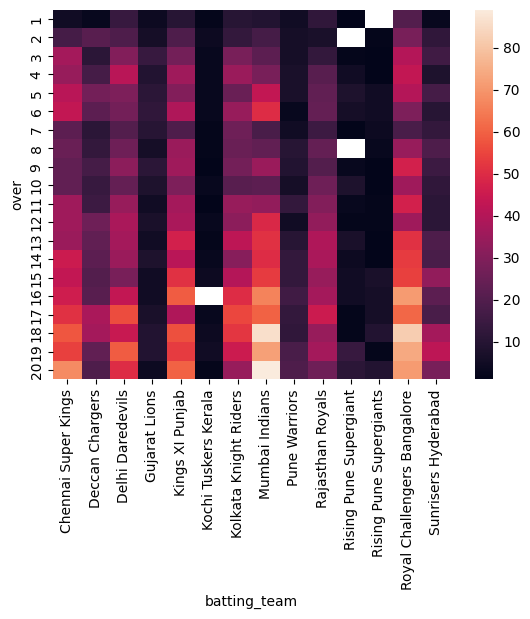

In [16]:
sns.heatmap(
    pt
)